In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Return Forecasting: Time Series Analysis & Modelling with CAD-PHY Exchange rate data.
In this notebook, you will load historical Canadian Dollar-Yen exchange rate futures data and apply time series analysis and modeling to determine whether there is any predictable behavior.

In [2]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


# Initial Time-Series Plotting

 Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

<AxesSubplot:xlabel='Date'>

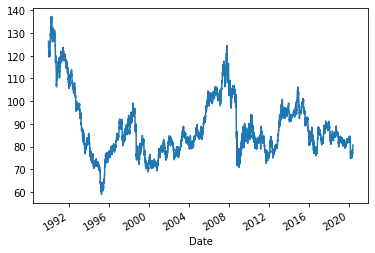

In [4]:
# Plot just the "Price" column from the dataframe:
cad_jpy_df.Price.plot()

**Question:** Do you see any patterns, long-term and/or short? 

**Answer:** YOUR ANSWER HERE

- According to the above chart, the Yen appears to have had some short/quick peaks and valleys vs the dollar, however over the long term - at the end it appears to be levelling out.  Which indicates it may be averaging out and less volitile near over the last 8 years(2012-2020).

# Decomposition Using a Hodrick-Prescott Filter

 Using a Hodrick-Prescott Filter, decompose the exchange rate price into trend and noise.

In [5]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
noise, trend = sm.tsa.filters.hpfilter(cad_jpy_df["Price"])

In [6]:
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:
exchange_price_df = cad_jpy_df[["Price"]].copy()
exchange_price_df["noise"] = noise
exchange_price_df["trend"] = trend
exchange_price_df.head(10)

,Price,noise,trend
Date,,,
1990-01-02,126.37,0.519095,125.850905
1990-01-03,125.30,-0.379684,125.679684
1990-01-04,123.46,-2.048788,125.508788
1990-01-05,124.54,-0.798304,125.338304
1990-01-08,124.27,-0.897037,125.167037
1990-01-09,125.10,0.106703,124.993297
1990-01-10,125.81,0.995171,124.814829
1990-01-11,125.85,1.220552,124.629448
1990-01-12,126.00,1.564410,124.435590


<AxesSubplot:title={'center':'Rate Price vs. The trend for 2015'}, xlabel='Date'>

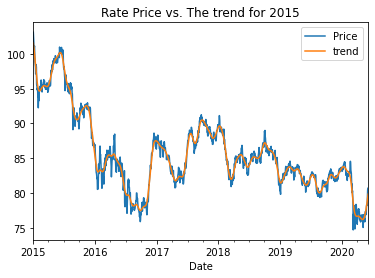

In [7]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present

rate_vs_trend = exchange_price_df.loc["2015-01-01":]
rate_vs_trend.plot (y=["Price", "trend"], title = "Rate Price vs. The trend for 2015")


**Question:** Do you see any patterns, long-term and/or short?

**Answer:** Appears that the Cad dollar was stronger agains the jpy currency  earlier, but is losing its value as time goes on

<AxesSubplot:title={'center':'settle noise'}, xlabel='Date'>

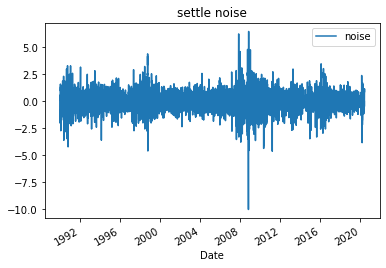

In [8]:
# Plot the Settle Noise
exchange_price_df.plot(y='noise', title='settle noise',legend=True)

---

In [9]:
#Please note we were instructed to skip the ARMA model section by the professor as it was not working properly


# Forecasting the Exchange Rate Price using an ARIMA Model

 1. Using the *raw* CAD/JPY exchange rate price, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
 3. Plot a 5 day forecast for the Exchange Rate Price. What does the model forecast predict will happen to the Japanese Yen in the near term?

In [140]:
#Cherck data
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


<AxesSubplot:xlabel='Date'>

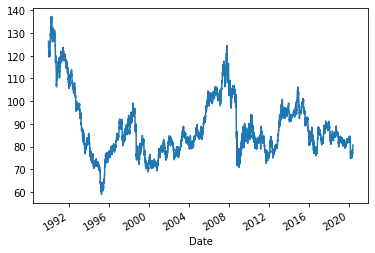

In [141]:
#Plotting and Data Check
cad_jpy_df.Price.plot()

<AxesSubplot:xlabel='Date'>

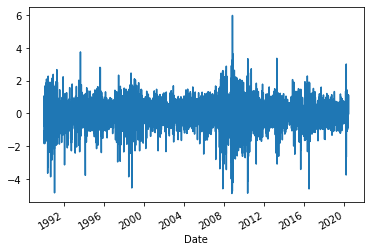

In [144]:
#Plotting and Data Check
cad_jpy_df.Price.diff().plot()

In [148]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
#get rid of future wanrings
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
model = ARIMA(cad_jpy_df['Price'].values, order=(5, 1, 1))



# Fit the model
results = model.fit()

In [149]:
# Output model summary results:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7929
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -8745.898
Date:                Sat, 06 Aug 2022   AIC                          17505.796
Time:                        13:53:07   BIC                          17554.643
Sample:                             0   HQIC                         17522.523
                               - 7929                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4303      0.331      1.299      0.194      -0.219       1.080
ar.L2          0.0178      0.012      1.459      0.145      -0.006       0.042
ar.L3         -0.0118      0.009     -1.313      0.189      -0.029       0.006
ar.L4          0.0110      0.008      1.299      0.194      -0.006       0.028
ar.L5         -0.0191      0.007     -2.706      0.007      -0.033      -0.005
ma.L1         -0.4583      0.332     -1.381      0.167      -1.109       0.192
sigma2         0.5318      0.004    118.418      0.000       0.523       0.541
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9233.72
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [153]:
from pandas import DataFrame

<AxesSubplot:>

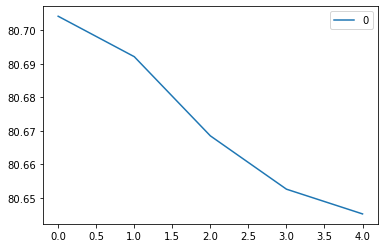

In [158]:
# Plot the 5 Day Price Forecast
forecast = pd.DataFrame(results.forecast(steps=5))
forecast.plot()

**Question:** What does the model forecast will happen to the Japanese Yen in the near term?

**Answer:** According to the numbers and findings it appears the Yen will be stronger in the near future.

# Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen exchange rate returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 
Using exchange rate *Returns*, estimate a GARCH model. **Hint:** You can reuse the `returns` variable from the ARMA model section.

1. GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
2. Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the volatility.

In [90]:
import arch as arch


In [91]:
# Read CSV, parse dates, and set index
csvpath = Path('cad_jpy.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.head(10)

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64
1982-01-12,187.20,187.20,187.20,187.20
1982-01-13,188.35,188.35,188.35,188.35
1982-01-14,187.96,187.96,187.96,187.96
1982-01-15,187.88,187.88,187.88,187.88


In [92]:
 # Daily percentage changes in exchange rate (resampled to daily)
df["returns"] = df.Price.pct_change() *100 * 24
df = df.resample('D').mean()
df = df.dropna()
df.head()

#pip install arch used

,Price,Open,High,Low,returns
Date,,,,,
1982-01-06,185.06,185.06,185.06,185.06,5.329001
1982-01-07,186.88,186.88,186.88,186.88,23.603156
1982-01-08,186.58,186.58,186.58,186.58,-3.852740
1982-01-11,187.64,187.64,187.64,187.64,13.634902
1982-01-12,187.20,187.20,187.20,187.20,-5.627798


<AxesSubplot:xlabel='Date'>

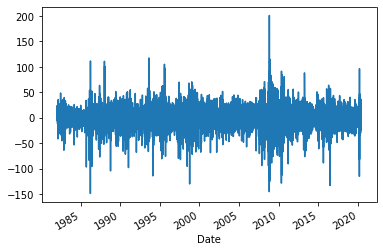

In [95]:
df.returns.plot()

In [97]:
# Create the GARCH model
from arch import arch_model

In [98]:
# Estimate a GARCH model:
model = arch_model(df.returns, mean="Zero", vol="GARCH",p=2, q=1)

# Fit the model
results = model.fit(disp="off")

In [32]:
# Summarize the model results
garch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8911.02
Distribution:                  Normal   AIC:                           17830.0
Method:            Maximum Likelihood   BIC:                           17858.0
                                        No. Observations:                 7928
Date:                Mon, Nov 09 2020   Df Residuals:                     7924
Time:                        14:38:43   Df Model:                            4
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.0733e-03  2.545e-03      3.566  3.628e-04  [4.086e-03,1.406e-02]
alpha[1]       0.0624  1.835e-02      3.402  6.682e-04  [2.647e-02,9.841e-02]
alpha[2]       0.0000  2.010e-02      0.000      1.000 [-3.940e-02,3.940e-02]
beta[1]        0.9243  1.229e-02     75.205      0.000      [  0.900,  0.948]
=============================================================================

Covariance estimator: robust
"""

**Note:** Our p-values for GARCH and volatility forecasts tend to be much lower than our ARMA/ARIMA return and price forecasts. In particular, here we have all p-values of less than 0.05, except for alpha(2), indicating overall a much better model performance. In practice, in financial markets, it's easier to forecast volatility than it is to forecast returns or prices. (After all, if we could very easily predict returns, we'd all be rich!)

In [100]:
# Find the last day of the dataset
last_day = df.returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [101]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
forecasts = results.forecast(start=last_day, horizon=forecast_horizon)

In [102]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,298.639812,298.825,299.007401,299.187059,299.364016


In [103]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2020-06-04
h.1,298.639812
h.2,298.825000
h.3,299.007401
h.4,299.187059
h.5,299.364016


<AxesSubplot:title={'center':'5 Day Exchange Rate Forecast of Volatility'}>

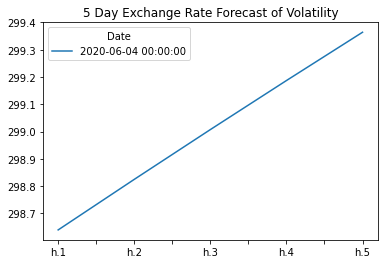

In [104]:
# Plot the final forecast
final.plot(title="5 Day Exchange Rate Forecast of Volatility")

---Pleare note, we could not complete ARMA section as instructed

---

# Conclusions

1. Based on your time series analysis, would you buy the yen now?

    * I would buy the yen as it appears to be strengthen over time and more stable

2. Is the risk of the yen expected to increase or decrease?
    * It would appear that the risk is decreasing over time as the Yen is stablizing out

3. Based on the model evaluation, would you feel confident in using these models for trading?
    * As far as we could go withough the ARMA I would feel hesitant in going forward without more data